In [49]:
# 5-Bar Linkage : Inverse Kinematics
#
# from Study and Development of Parallel Robots Based On 5-Bar Linkage
# Manh Tuong Hoang, Trung Tin Vuong, Cong Bang Pham 2015
# https://www.researchgate.net/publication/283356024_Study_and_Development_of_Parallel_Robots_Based_On_5-Bar_Linkage

import math
import numpy as np

import matplotlib.pyplot as plt

base = 10 # distance between servos, lc in the paper ^^
proximal = 10 # from each servo to elbow, la ^^
distal = 10 # elbow to pen, lb ^^

def inverseKinematic(x, y):
    E1 = -2*proximal*x
    F1 = -2*proximal*y
    G1 = proximal*proximal-distal*distal+x*x+y*y
    E4 = 2*proximal*(base-x)
    F4 = 2*proximal*y
    G4 = base*base + proximal*proximal - distal*distal + x*x + y*y - 2*base*x

    if((E1*E1+F1*F1-G1*G1) > 0):
        lumpD1plus = (-F1+math.sqrt(E1*E1+F1*F1-G1*G1))/(G1-E1)
        D1plus = 2*math.atan(lumpD1plus)
        lumpD1minus = (-F1-math.sqrt(E1*E1+F1*F1-G1*G1))/(G1-E1)
        D1minus = 2*math.atan(lumpD1minus)

    if((E4*E4+F4*F4-G4*G4) > 0):
        lumpD4plus = (-F4+math.sqrt(E4*E4+F4*F4-G4*G4))/(G4-E4)
        D4plus = 2*math.atan(lumpD4plus)
        lumpD4minus = (-F4-math.sqrt(E4*E4+F4*F4-G4*G4))/(G4-E4)
        D4minus = 2*math.atan(lumpD4minus)
        
# draw servo positions & pen point
# (quick & dirty!)
def draw(angleLeft, angleRight, x, y):
    length = 10

    leftHome = [-10, 0]
    rightHome = [10, 0]

    # sums
    leftEndx = length * math.cos(math.radians(angleLeft)) + leftHome[0]
    leftEndy = length * math.sin(math.radians(angleLeft))
    # transpose for drawing
    leftEnd = [leftEndx , leftEndy]
    xLeft = [leftHome[0], leftEnd[0]]
    yLeft = [leftHome[1], leftEnd[1]]

    rightEndx = length * math.cos(math.radians(angleRight)) + rightHome[0]
    rightEndy = length * math.sin(math.radians(angleRight))
    rightEnd = [rightEndx , rightEndy]
    xRight = [rightHome[0], rightEnd[0]]
    yRight = [rightHome[1], rightEnd[1]]

    plt.xlim(-25, 25), plt.ylim(-5, 25)
    plt.grid()
    plt.scatter(x,y, c='r') 
    plt.plot(xLeft, yLeft, marker = 'o')
    plt.plot(xRight, yRight, marker = 'o')
    


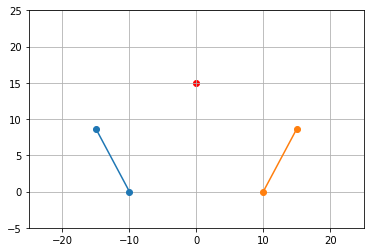

In [50]:

draw(120, 60, 0, 15)